<a href="https://colab.research.google.com/github/GENTLEW1ND/LearningGenAi/blob/main/Text_to_image_generation_with_LLM_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Diffusers is a hugging face page for using diffusion models from hugginggace hub
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.8.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt="""A 3D-rendered futuristic cityscape at dusk, with neon-lit skyscrapers, flying cars, and a reflective river running through, vibrant colors, cyberpunk aesthetic, high detail."""

In [6]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: A 3D-rendered futuristic cityscape at dusk, with neon-lit skyscrapers, flying cars, and a reflective river running through, vibrant colors, cyberpunk aesthetic, high detail.


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

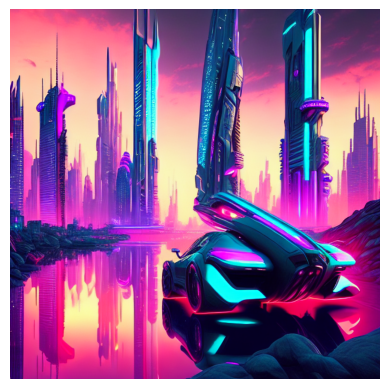

In [7]:
print("[PROMPT]:", prompt)
plt.imshow(image);
plt.axis('off')

## Workng with Stable Diffusion parameters

Negative prompting

num_inference_steps

height

weight

num_images_per_prompt

In [8]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis('off')

  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()

In [9]:
prompt="""A 3D-rendered futuristic cityscape at dusk, with neon-lit skyscrapers, flying cars, and a reflective river running through, vibrant colors, cyberpunk aesthetic, high detail."""

params={}

  0%|          | 0/50 [00:00<?, ?it/s]

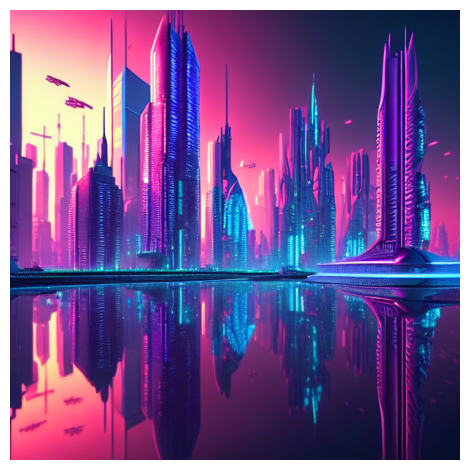

In [10]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

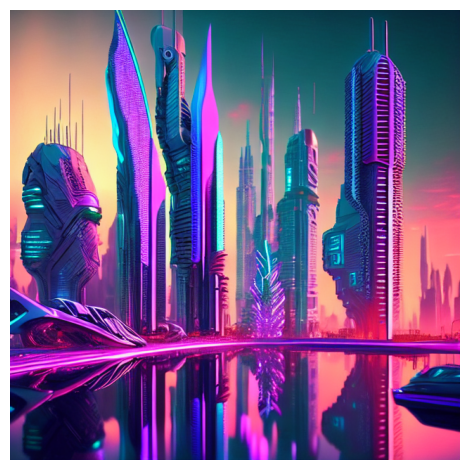

In [11]:
# num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

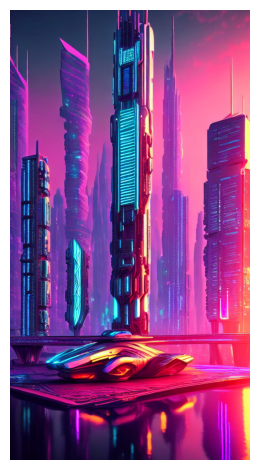

In [12]:
#Height weight
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

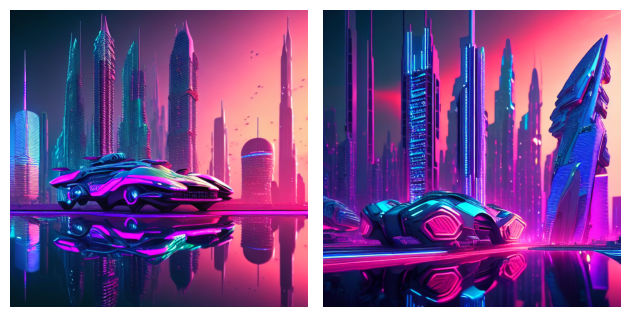

In [13]:
#num_images_per_prompt
params={'num_inference_steps':100, 'num_images_per_prompt':2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

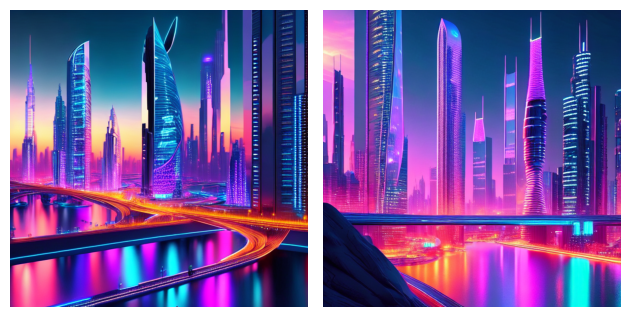

In [14]:
#Negative prompt
params = {'num_inference_steps':100, 'num_images_per_prompt':2, 'negative_prompt':'ugly, distorted, low quality'}
generate_image(pipe, prompt, params)